## Predicting House Prices
This assignment tasks us with using linear regression to predict house prices from [Kaggle's house prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  The data consists of sales price (the target), 79 features, and an id column.  

Details of each feature can be found in the link above, but the features can split into 9 categories: 1) type of dwelling, 2) zoning information, 3) lot information, 4) utilities, 5) neighborhood, 6) conditions, 7) quality, 8) exterior information, and 9) rooms information.  

### 1 - Load and Inspect Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from tabulate import tabulate
import statsmodels.api as sm


C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('houseprices.cvs')

In [3]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The first thing I do is look at info and describe.  From the info, I see this dataset is about 4 MB of memory, with 3 features that are floats, 35 integers, and 43 objects. Most features have all values filled in, but some of them have very little, such as alley and poolqc, which have 91 and 7 non missing values.  

A quick scan of the describe function shows nothing is below 0, and many numeric features are skewed.  

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2 - Data Exploration

#### 2.1 - Checking Data Types
The first thing I want to do is make sure all the features currently labeled as objects are actually objects and not numerical values entered as strings.  

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].head())

mszoning
0    RL
1    RL
2    RL
3    RL
4    RL
Name: mszoning, dtype: object
street
0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: street, dtype: object
alley
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: alley, dtype: object
lotshape
0    Reg
1    Reg
2    IR1
3    IR1
4    IR1
Name: lotshape, dtype: object
landcontour
0    Lvl
1    Lvl
2    Lvl
3    Lvl
4    Lvl
Name: landcontour, dtype: object
utilities
0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: utilities, dtype: object
lotconfig
0    Inside
1       FR2
2    Inside
3    Corner
4       FR2
Name: lotconfig, dtype: object
landslope
0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
Name: landslope, dtype: object
neighborhood
0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: neighborhood, dtype: object
condition1
0     Norm
1    Feedr
2     Norm
3     Norm
4     Norm
Name: condition1, dtype: object
condition2
0    Norm
1    Norm
2    Norm
3    Norm
4    Norm
Name: condition2, dtype: 

All objects look like they should be categorical.  

#### 2.2 - A Look at Target Variable
The target variable here is sale prices.  From the distribution below, we see that prices are right skewed, with a peak at ~\$140k.  The boxplot suggests that super expensive prices start at ~\$350k.  Its a little bit more difficult to tell what a constitutes a super cheap house, but from the distribution and common knowledge, I'd say it is under \$90k.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text xticklabel objects>)

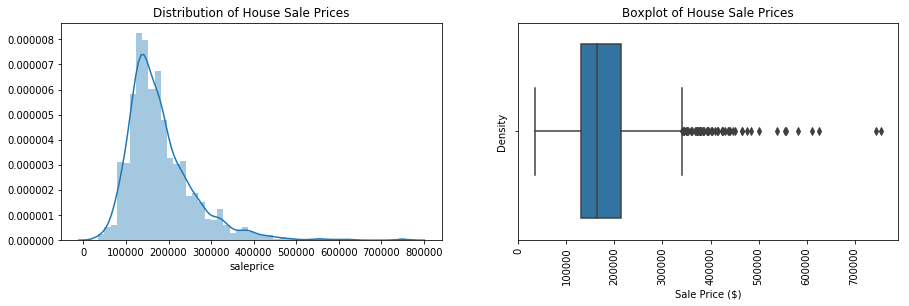

In [7]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))

sns.distplot(df['saleprice'], ax = axis1)
sns.boxplot(x = 'saleprice', data = df, ax = axis2)

axis1.set_title('Distribution of House Sale Prices')
axis2.set_title('Boxplot of House Sale Prices')

plt.ylabel('Density')
plt.xlabel('Sale Price ($)')
plt.xticks(rotation =90)

#### 2.3 Correlations
How do we find out what features are important for sale prices?  A correlation matrix is a start.  Below is a heatmap of the absolute value of correlation values.  Using the absolute value loses information, mainly if the feature is negatively or positively correlated.  But I find it much easier to look for one color (dark red in this case) and figure out trends when I take a closer look later.  

From the heatmap below, it looks like 'overallqual' has the strongest correlation.  Moderate correlations include 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', and 'firstflrsf'.  These features, in English, are overall quality, the square feet in living area above ground, garage's car capacity, garage square footage, basement square footage, and first floor square footage.  


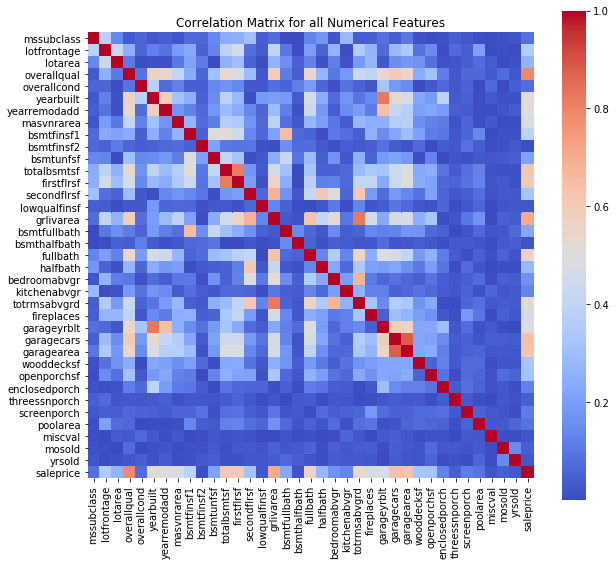

In [8]:
plt.figure(figsize=(10,9))
sns.heatmap(np.absolute(df.drop('id', axis =1).corr()), square = True, cmap = 'coolwarm')
plt.title('Correlation Matrix for all Numerical Features')

In [9]:
num_col = ['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf']

A smaller heatmap of the moderate to strongly correlated features are shown below.  From this heatmap, we are able to see that the strongest correlations to sale price are 'overallqual' and 'grlivarea'.  There are also two pairs of features that are highly correlated with each other: garagearea:garagecars and firstflrsf:totalbsmtsf.  It would be useful to know if one or two of these features can be removed without negatively affecting the performance of the model.  

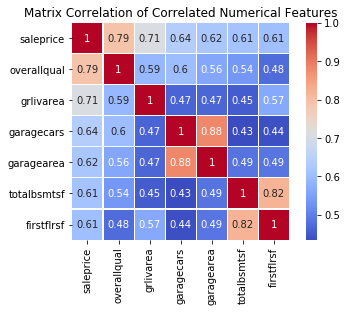

In [10]:
sns.heatmap(np.absolute(pd.concat([df['saleprice'], df[num_col]], axis = 1).corr()), 
            square = True, annot = True, linewidth = 0.1, cmap = 'coolwarm')
plt.title('Matrix Correlation of Correlated Numerical Features')

None of these features have missing values.  Why don't I try applying these features into a linear regression and see how good it is?

In [11]:
print(tabulate([[col, df[col].isnull().sum()/df.shape[0]*100, df[col].nunique()] for col in num_col], headers = ['Feature', '% Missing', 'Unique Values']))

Feature        % Missing    Unique Values
-----------  -----------  ---------------
overallqual            0               10
grlivarea              0              861
garagecars             0                5
garagearea             0              441
totalbsmtsf            0              721
firstflrsf             0              753


### 3 - First Iteration - Only Numerical Features
Coefficients for each feature are found in the middle section under 'coef'.  The features with the largest coefficients are overallqual and garagecars.  The R-squared value, which is a measure of how well this model fits the data, is 0.762.  Can this number be improved by adding categorical features?

In [12]:
Y = df['saleprice']
X = df[num_col]
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     775.0
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:47:54   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.027e+05   4903.994    -20.932      0.000   -1.12e+05    -9.3e+04
overallqual    2.4e+04   1083.393     22.150      0.000    2.19e+04    2.61e+04
grlivarea      43.1229      2.679     16.095      0.000      37.867      48.379
garagecars   1.452e+04   3018.621      4.809      0.000    8593.872    2.04e+04
garagearea     15.6639     10.475      1.495      0.135      -4.884      36.212
totalbsmtsf    24.3908      4.318      5.649      0.000      15.921      32.860
firstflrsf     11.1859      5.032      2.223      0.026       1.315      21.057
==============================================================================
Omnibus:                      431.781   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39208.253
Skew:                          -0.313   Prob(JB):                         0.00
Kurtosis:                      28.380   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3.1 - Removing Highly Correlated Numerical Features
Garage area had no effect on the model's R-squared, and square footage of the first floor only negatively impacted the R-squared value by 0.001.  In future models, these two features can be removed.  

In [13]:
Y = df['saleprice']
X = df[['overallqual',
 'grlivarea',
 'garagecars',
#  'garagearea',
 'totalbsmtsf']]
#  'firstflrsf']]
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1156.
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:47:54   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1455   BIC:                         3.504e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.925e+04   4639.866    -21.390      0.000   -1.08e+05   -9.01e+04
overallqual  2.357e+04   1072.465     21.980      0.000    2.15e+04    2.57e+04
grlivarea      45.6432      2.484     18.376      0.000      40.771      50.515
garagecars   1.858e+04   1747.412     10.634      0.000    1.52e+04     2.2e+04
totalbsmtsf    32.5203      2.838     11.459      0.000      26.953      38.087
==============================================================================
Omnibus:                      421.692   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36798.858
Skew:                          -0.273   Prob(JB):                         0.00
Kurtosis:                      27.589   Cond. No.                     8.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
num_col = ['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf']

### 4 - Looking at Categorical Features

#### 4.1 - Missing Data
The table below gives us a good idea of which columns have a lot of missing variables and how many unique values there are in each columns, which will be useful for choosing which columns to one hot encode.  

Two things to note:  most of the features with missing values are categorical, and some of them have really high percent missing (80%+).  I won't remove those just yet...its possible that those without values can tell us a lot.  

In [15]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

In [16]:
print(tabulate([[col, df[col].isnull().sum()/df.shape[0]*100, df[col].nunique()] for col in cat_col], headers = ['Feature', '% Missing', 'Unique Values']))

Feature          % Missing    Unique Values
-------------  -----------  ---------------
mszoning         0                        5
street           0                        2
alley           93.7671                   2
lotshape         0                        4
landcontour      0                        4
utilities        0                        2
lotconfig        0                        5
landslope        0                        3
neighborhood     0                       25
condition1       0                        9
condition2       0                        8
bldgtype         0                        5
housestyle       0                        8
roofstyle        0                        6
roofmatl         0                        8
exterior1st      0                       15
exterior2nd      0                       16
masvnrtype       0.547945                 4
exterqual        0                        4
extercond        0                        5
foundation       0              

Some of the categorical features have more than 10 unique values, so one hot encoding all of these unique values would be very computationally taxing.  For this exercise, I will concentrate on features with 5 or less unique values.  

In [17]:
cat_col_less = [col for col in cat_col if df[col].nunique() < 6]

##### 4.1.1 - Alley
Alley is one of those with more than 50% missing values.  It will be interesting to see if this feature affects sale prices or not.  At the moment, it has two unique values: 'Grvl' and 'Pave', which represents if the alley to access the property is gravel or paved.  Houses without a value most likely indicate they do not have an alley.  In this case, I can impute 'None' to indicate there is no alley.

In [18]:
df['alley'].fillna('None', inplace = True)

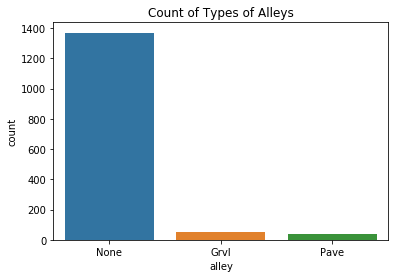

In [19]:
sns.countplot(df['alley'])
plt.title('Count of Types of Alleys')

##### 4.1.2 - Masonry Veneer Type
There are about 0.5% missing values from this feature, and unlike the alley feature, there is already a category for 'None'.  This 'None' category is by car the most common veneer type, so I will fill in missing values with 'None'.  

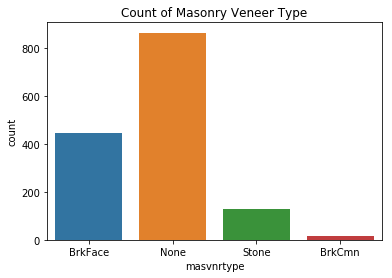

In [20]:
sns.countplot(df['masvnrtype'])
plt.title('Count of Masonry Veneer Type')

In [21]:
df['masvnrtype'].fillna('None', inplace = True)

##### 4.1.3 - Basement 
There are three features that are related to the basement: basement quality, basement conditions, and basement exposure.  The quality evaluates the height of the basement whereas the condition evaluates the general condition of the basement.  Both have ratings of good, typical, excellent, or fair.  If there is no value, then there is no basement.  

Basement exposure refers to the garden level walls, and exposures are rated as good, average, minimum, or no exposure.  Similarly, if the value is missing there is no basement.  

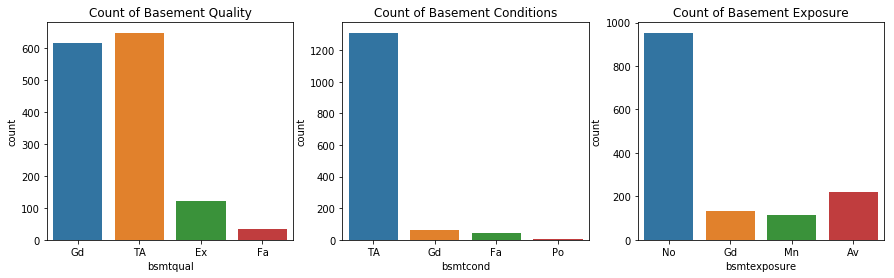

In [22]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(15,4))

sns.countplot(df['bsmtqual'], ax = axis1)
sns.countplot(df['bsmtcond'], ax = axis2)
sns.countplot(df['bsmtexposure'], ax = axis3)

axis1.set_title('Count of Basement Quality')
axis2.set_title('Count of Basement Conditions')
axis3.set_title('Count of Basement Exposure')

In [23]:
df['bsmtqual'].fillna('None', inplace = True)
df['bsmtcond'].fillna('None', inplace = True)
df['bsmtexposure'].fillna('None', inplace = True)

##### 4.1.4 - Electrical
There is one missing value from the electrical feature, which indicates what type of fuse box the house has.  Since electricity is one of the requirements for a home, it is safe to assume this was a mistake.  By far, the most common type of fuse is a standard breaker (SBrkr), so I will fill in the missing row with this value.

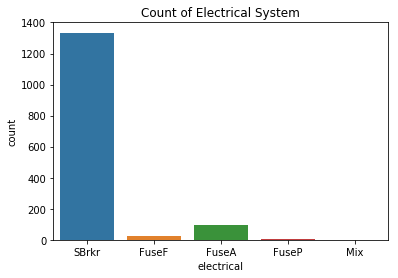

In [24]:
sns.countplot(df['electrical'])
plt.title("Count of Electrical System")

In [25]:
df['electrical'].fillna('SBrkr', inplace = True)

##### 4.1.5 - Fireplace Quality
Fireplace quality defines the condition of the fireplace, where values can be excellent, good, fair, typical, and poor.  If there is a missing value, it means there are no fireplaces.  As such, I will fill in missing values with 'None'.

In [26]:
df['fireplacequ'].fillna('None', inplace = True)

##### 4.1.6 - Garage
From the numerical section, I'm going to guess garages affect the sale prices a lot.  Categorical features relating to garages are garage finish, quality, and condition.  There are 81 missing values for each of these features, and there are 81 homes with 0 cars that fit in the garage (most likely doesn't have a garage).  The missing values here will be filled in with 'None'.

In [27]:
for col in ['garagefinish', 'garagequal', 'garagecond']:
    print('There are {} values missing for {}.'.format(df[df[col].isnull()].shape[0], col))

There are 81 values missing for garagefinish.
There are 81 values missing for garagequal.
There are 81 values missing for garagecond.


In [28]:
print('There are {} homes with 0 car garages.'.format(df[df['garagecars']==0].shape[0]))

There are 81 homes with 0 car garages.


In [29]:
for col in ['garagefinish', 'garagequal', 'garagecond']:
    df[col].fillna('None', inplace = True)

##### 4.1.7 - Pool Quality
There are 1453 homes missing a value in pool quality, which corresponds to the number of homes that do not have a pool.  These homes will have a pool quality of 'None'.  

In [30]:
print('There are {} missing values in pool quality.'.format(df[df['poolqc'].isnull()].shape[0]))
print('There are {} homes without a pool.'.format(df[df['poolarea']==0].shape[0]))

There are 1453 missing values in pool quality.
There are 1453 homes without a pool.


In [31]:
df['poolqc'].fillna('None', inplace  = True)

##### 4.1.8 - Fence
The fence feature refers to the level of privacy a fence provides.  If there is a missing value, it means there is no fence.  

In [32]:
df['fence'].fillna('None', inplace = True)

##### 4.1.9 - Miscellaneous Features
This feature is a catch all for houses that have stranger ammenities such as elevators, tennis courts, and sheds.  If there are no miscellaneous features, then it is reflected as a missing value.  These will be converted to 'None'.  

In [33]:
df['miscfeature'].fillna('None', inplace = True)

#### 4.2 - Creating Dummy Variables
Now that the missing values has been imputed, it is time to create dummy variables.  

In [34]:
df2 = df[num_col]

In [35]:
for col in cat_col_less:
    df2 = pd.concat([df2, pd.get_dummies(df[col], drop_first=True, prefix = col)], axis = 1)

### 5 - Second Iteration - Numerical and Categorical Features
Now that I've selected numerical and categorical features, I can apply a linear regression model again.  This time, the R-squared value is 0.85, much better than the previous value of 0.76.  

In [36]:
Y2 = df['saleprice']
X2 = df2
X2 = sm.add_constant(X2)
results2 = sm.OLS(Y2, X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     86.38
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:47:59   Log-Likelihood:                -17158.
No. Observations:                1460   AIC:                         3.450e+04
Df Residuals:                    1369   BIC:                         3.498e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.465e+05   5.15e+04      2.844      0.005    4.54e+04    2.48e+05
overallqual         1.057e+04   1210.061      8.733      0.000    8193.207    1.29e+04
grlivarea             46.1628      2.420     19.077      0.000      41.416      50.910
garagecars          1.307e+04   1956.934      6.678      0.000    9229.284    1.69e+04
totalbsmtsf           17.0243      2.930      5.810      0.000      11.276      22.772
mszoning_FV          4.48e+04   1.22e+04      3.688      0.000     2.1e+04    6.86e+04
mszoning_RH         3.564e+04   1.36e+04      2.629      0.009    9047.687    6.22e+04
mszoning_RL         3.566e+04   1.13e+04      3.151      0.002    1.35e+04    5.79e+04
mszoning_RM         2.462e+04   1.14e+04      2.160      0.031    2261.895     4.7e+04
street_Pave         6671.8158   1.49e+04      0.447      0.655   -2.26e+04     3.6e+04
alley_None          5246.4449   5149.607      1.019      0.308   -4855.530    1.53e+04
alley_Pave          1329.4662   7631.495      0.174      0.862   -1.36e+04    1.63e+04
lotshape_IR2        8357.4177   5470.093      1.528      0.127   -2373.255    1.91e+04
lotshape_IR3       -2.602e+04   1.09e+04     -2.390      0.017   -4.74e+04   -4666.210
lotshape_Reg       -1293.5268   2056.651     -0.629      0.529   -5328.056    2741.003
landcontour_HLS     2.307e+04   6381.993      3.614      0.000    1.05e+04    3.56e+04
landcontour_Low     1.993e+04   7732.475      2.578      0.010    4763.705    3.51e+04
landcontour_Lvl     1.688e+04   4599.389      3.670      0.000    7857.999    2.59e+04
utilities_NoSeWa   -3.874e+04   3.24e+04     -1.194      0.233   -1.02e+05    2.49e+04
lotconfig_CulDSac   1.377e+04   4092.458      3.364      0.001    5736.911    2.18e+04
lotconfig_FR2      -6503.1127   5168.178     -1.258      0.208   -1.66e+04    3635.293
lotconfig_FR3      -2609.5353   1.64e+04     -0.159      0.873   -3.47e+04    2.95e+04
lotconfig_Inside    1396.6712   2288.226      0.610      0.542   -3092.139    5885.481
landslope_Mod       8792.3149   5042.838      1.744      0.081   -1100.212    1.87e+04
landslope_Sev       2117.7957   1.08e+04      0.195      0.845   -1.91e+04    2.34e+04
bldgtype_2fmCon    -1.056e+04   6460.694     -1.634      0.103   -2.32e+04    2117.891
bldgtype_Duplex    -2.286e+04   5344.369     -4.277      0.000   -3.33e+04   -1.24e+04
bldgtype_Twnhs      -1.71e+04   5527.517     -3.093      0.002   -2.79e+04   -6252.174
bldgtype_TwnhsE    -1.528e+04   3605.178     -4.238      0.000   -2.24e+04   -8205.802
masvnrtype_BrkFace  1.429e+04   8616.561      1.658      0.097   -2612.814    3.12e+04
masvnrtype_None     1.309e+04   8503.682      1.539      0.124   -3595.584    2.98e+04
masvnrtype_Stone    1.756e+04   9161.290      1.916      0.056    -415.963    3.55e+04
exterqual_Fa       -2.821e+04   1.29e+